<a href="https://colab.research.google.com/github/desankha88/desankha88/blob/main/diabetes_longQuizB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [526]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from math import sqrt

from sklearn.preprocessing import StandardScaler

In [527]:
X,y = load_diabetes(return_X_y=True,as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [528]:
y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [529]:
export_diabetes_df = X.copy()
export_diabetes_df['target'] = y.copy()

In [530]:
sc = StandardScaler(with_mean=True)
y = sc.fit_transform(y.to_numpy().reshape(-1, 1))
y = pd.DataFrame(y,columns=['target'])

In [531]:
y.head()

,target
0,-0.014719
1,-1.001659
2,-0.144580
3,0.699513
4,-0.222496


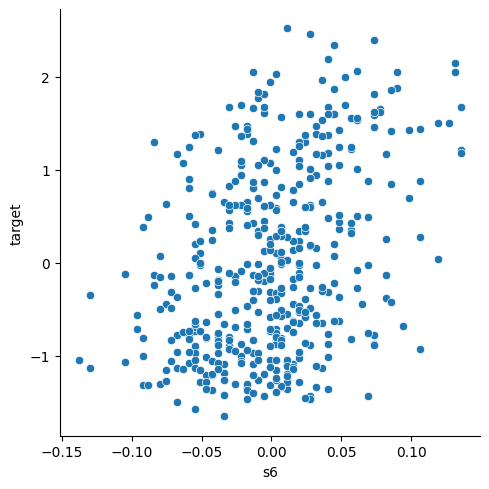

In [532]:
data_df = X
data_df['target'] = y.target
data_df.head()

sns.relplot(data_df,x='s6',y='target')

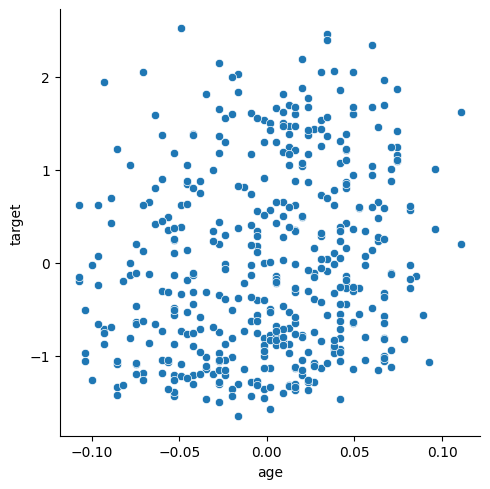

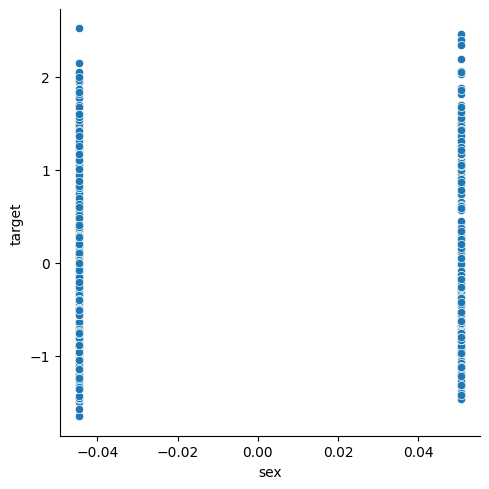

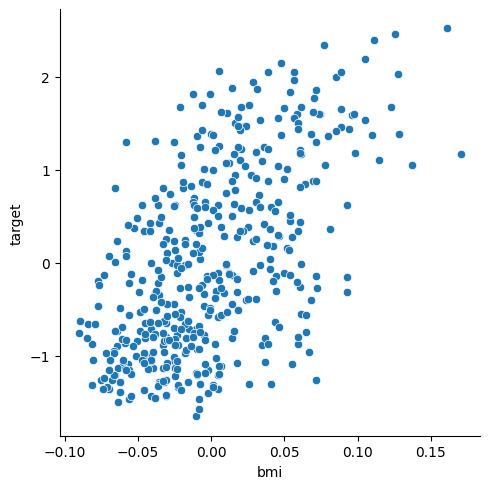

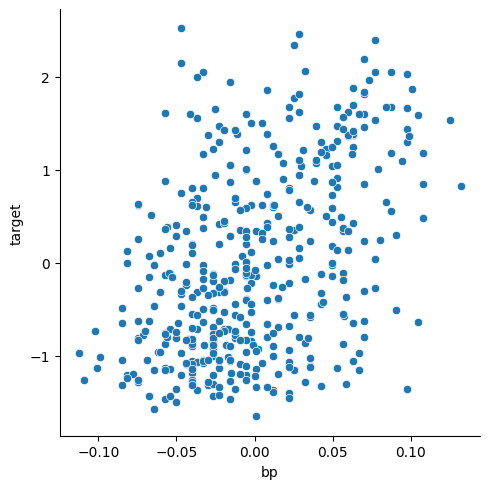

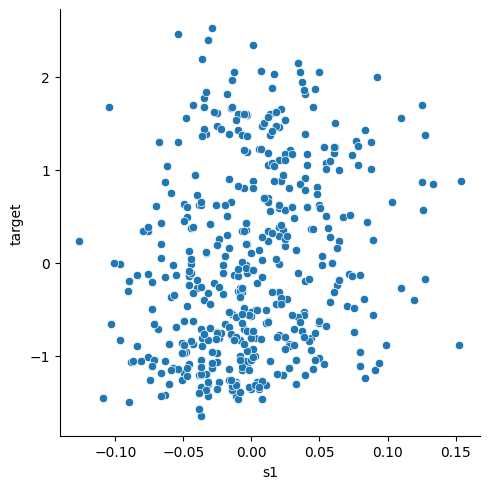

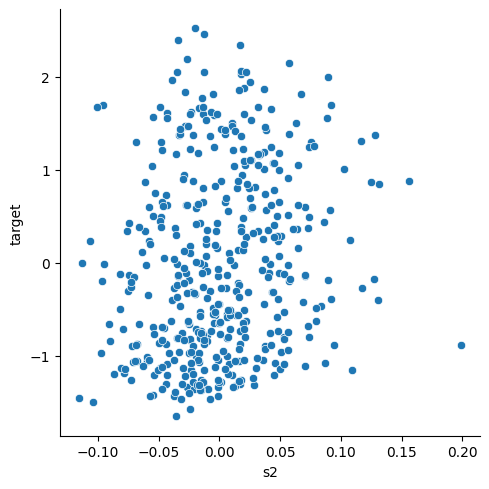

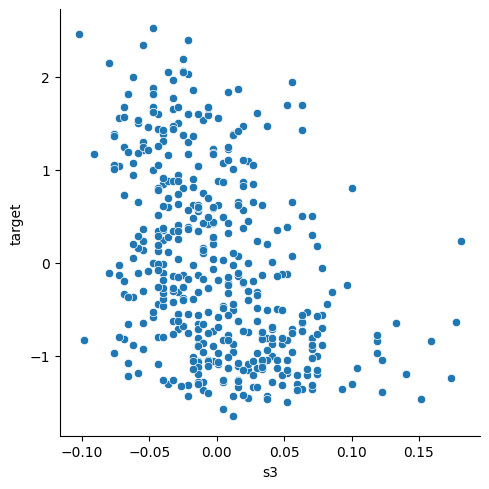

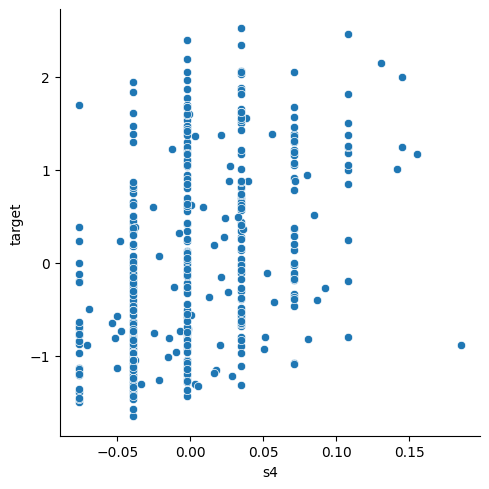

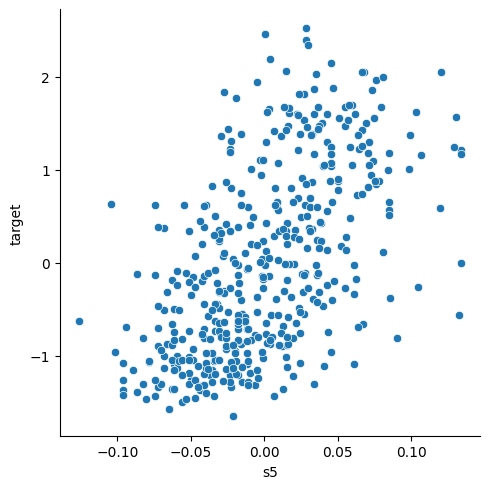

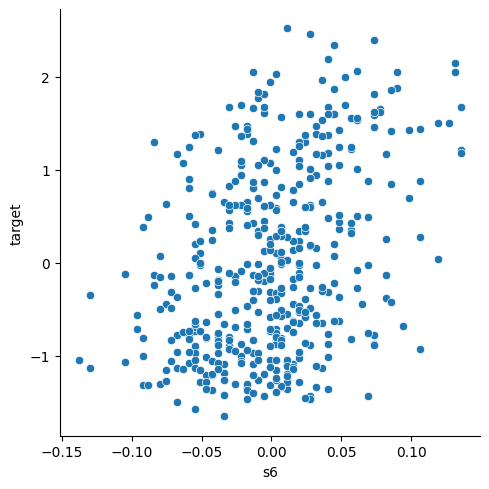

In [533]:
for column in data_df.columns:
    if column!= 'target':
        sns.relplot(data_df,x=column, y='target')

In [534]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [535]:
X.sex.unique()

array([ 0.05068012, -0.04464164])

In [536]:
y.target.unique()

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01,  2.06043272e-01, -1.09256112e+00,
       -1.33929596e+00,  1.20596866e+00,  4.13819975e-01,  6.47568766e-01,
       -1.96524090e-01, -8.71798376e-01, -2.74440354e-01,  1.69943833e+00,
       -3.00412442e-01, -1.20943552e+00,  2.45262887e+00, -8.45826288e-01,
       -1.13151925e+00, -6.51035629e-01,  1.46568953e+00,  1.60853602e+00,
        1.29687096e+00, -8.06868156e-01, -6.77007716e-01, -1.26137969e+00,
       -1.18346343e+00, -7.80896068e-01,  1.38777327e+00, -1.28735178e+00,
        4.91736239e-01, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -6.25063541e-01,  3.87847887e-01, -3.13398486e-01, -1.30033783e+00,
       -1.49512849e+00,  

In [537]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=42)

In [538]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 11), (45, 11), (397, 1), (45, 1))

In [539]:
model = xgb.XGBRegressor(
    n_estimators=150,            # Number of boosting rounds (trees) to be created. More trees can lead to better performance.
    max_depth=10,                 # Maximum depth of each tree. Controls the complexity of the model; deeper trees can capture more information but may overfit.
    eta=0.1,                     # Learning rate (also known as 'alpha'). A smaller value makes the model more robust but requires more boosting rounds.
    subsample=0.75,               # Fraction of samples used for fitting individual trees. Reduces overfitting by randomly sampling training data.
    colsample_bytree=0.75,        # Fraction of features used for each tree. Helps prevent overfitting by introducing randomness in feature selection.
    objective='reg:squarederror',# The learning task objective. Here, it indicates a regression task using squared error loss.
    random_state=0               # Random seed for reproducibility. Ensures that the results can be replicated across runs.
)

In [540]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.75, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, ...)

In [541]:
# Evaluate the model:
# Evaluate performance using the mean squared error and the root of the mean squared error
pred = model.predict(X_train)
print('linear train mse: {}'.format(mean_squared_error(y_train, pred)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred))))
print()

pred = model.predict(X_test)
print('linear test mse: {}'.format(mean_squared_error(y_test, pred)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred))))

linear train mse: 5.141650376572215e-07
linear train rmse: 0.0007170530229050161

linear test mse: 0.02994508668780327
linear test rmse: 0.17304648707154754


In [542]:
model.score(X_test, y_test)

0.9709703922271729

In [543]:
y_pred = sc.inverse_transform(pred.reshape(-1,1))

In [544]:
print(y_pred)

[[204.79393 ]
 [102.98471 ]
 [181.22037 ]
 [221.01874 ]
 [113.968155]
 [ 82.80487 ]
 [248.89835 ]
 [257.35406 ]
 [ 99.41704 ]
 [113.8659  ]
 [ 91.63063 ]
 [234.15324 ]
 [100.43225 ]
 [299.75452 ]
 [132.92184 ]
 [ 81.48789 ]
 [291.7915  ]
 [270.2167  ]
 [169.93185 ]
 [255.52692 ]
 [266.69785 ]
 [ 71.730095]
 [116.172455]
 [223.34781 ]
 [129.635   ]
 [127.52608 ]
 [260.90707 ]
 [104.0225  ]
 [ 48.017456]
 [108.418884]
 [156.09967 ]
 [109.65917 ]
 [115.102516]
 [171.87538 ]
 [178.19835 ]
 [227.59647 ]
 [ 50.67846 ]
 [ 83.48718 ]
 [172.36253 ]
 [ 60.876328]
 [ 56.09459 ]
 [101.98623 ]
 [161.43253 ]
 [160.36751 ]
 [108.69404 ]]


In [545]:
from sklearn.linear_model import LinearRegression

In [546]:
model2 = LinearRegression().fit(X_train,y_train)

model2.score(X_test, y_test)

1.0

In [547]:
export_diabetes_df.shape

(442, 11)

In [548]:
export_diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [550]:
export_diabetes_df.to_csv('diabetes.csv' , index=False)

In [555]:
test_df = pd.read_csv('diabetes.csv', header=0)
test_df.dtypes

,0
age,float64
sex,float64
bmi,float64
bp,float64
s1,float64
s2,float64
s3,float64
s4,float64
s5,float64
s6,float64


In [557]:
y = test_df['target']
type(y)
X = test_df.iloc[:,:-1]
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [558]:
X.shape

(442, 10)